# Zadanie 1

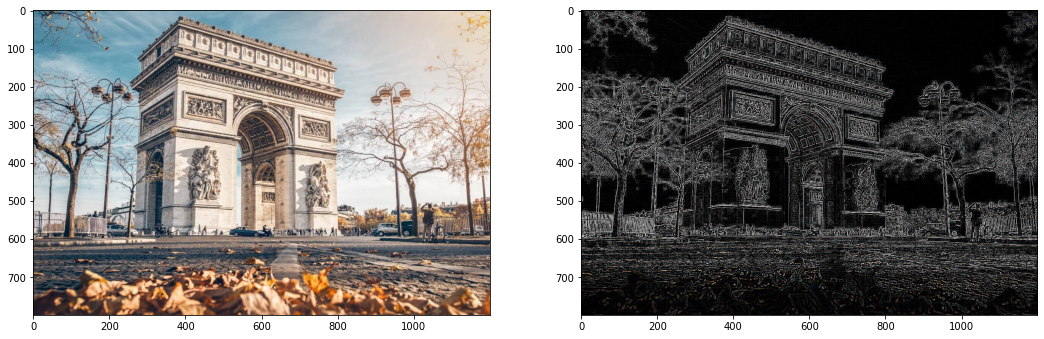

In [7]:
#
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18, 10)
image = cv.cvtColor(cv.imread("images/example.jpg"), cv.COLOR_BGR2RGB)
kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
]
kernel = np.asarray(kernel)
edgy_image = cv.filter2D(image, -1, kernel) 
fig, ax = plt.subplots(1,2)
ax[0].imshow(image)
ax[1].imshow(edgy_image)
#

# Zadanie 2

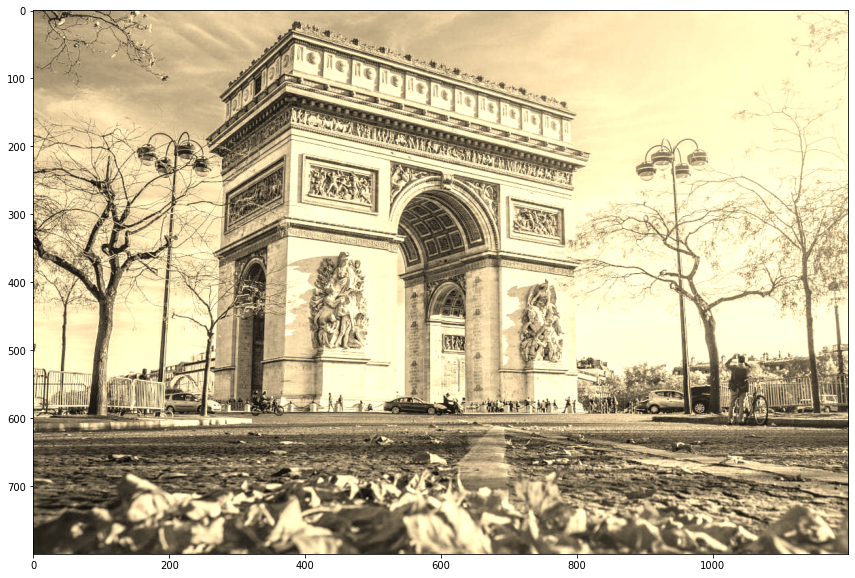

In [37]:
#
RGB = np.float32(image.reshape(-1,3))
RGB /= 255.
transform = [
    [0.393, 0.769, 0.189],
    [0.349, 0.689, 0.164],
    [0.272, 0.534, 0.131],
]
transform = np.asarray(transform)
newRGB = []
for row in RGB:
    col = np.asarray(row.reshape(3,1))
    sums = np.matmul(transform,col)
    sums = sums.reshape(1,3)
    newRGB.append(sums)
newRGB = np.clip(newRGB, 0.0, 1.0)
newRGB = np.asarray(newRGB).reshape(image.shape)
plt.imshow(newRGB)
#

# Zadanie 3

Text(0.5, 0, 'Cr')

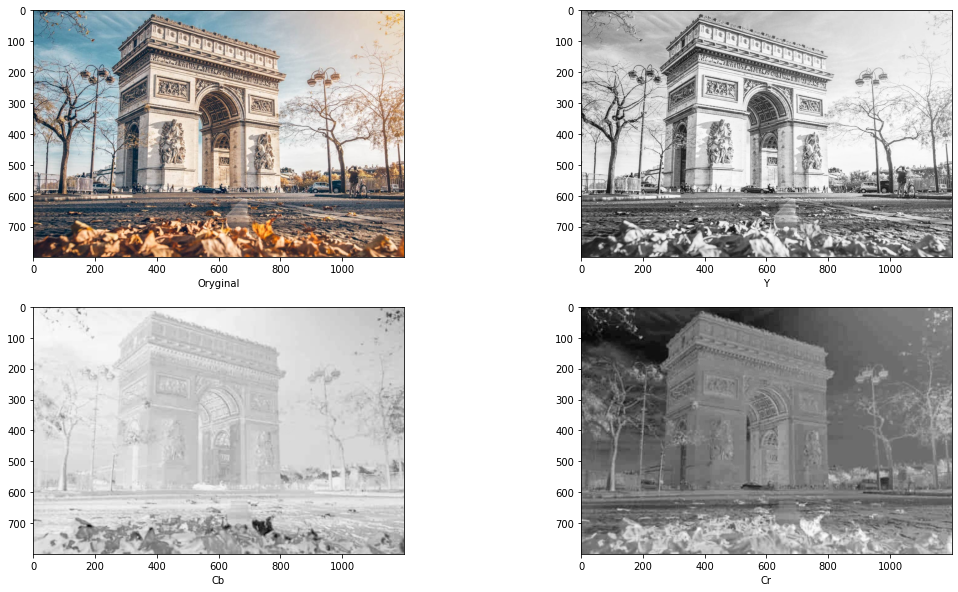

In [53]:
#
YCC = np.asarray(image.reshape(-1,3))
YCC = YCC.astype(np.uint8)
convert = [
    [0.229, 0.587, 0.114],
    [0.500, -0.418, -0.082],
    [-0.168, -0.331, 0.500],
]
convert = np.asarray(convert)
add = [
    [0],
    [128],
    [128],
]
add = np.asarray(add)
newYCC = []
for row in YCC:
    col = np.asarray(row.reshape(3,1))
    sums = np.matmul(convert,col)
    sums += add
    sums = sums.reshape(1,3)
    newYCC.append(sums)
np.clip(newYCC, 0, 255)
newYCC = np.asarray(newYCC).reshape(image.shape)
newYCC = newYCC.astype(np.uint8)
fig, ax = plt.subplots(2,2)
ax[0, 0].imshow(image)
ax[0, 0].set_xlabel("Oryginal")
ax[0, 1].imshow(newYCC[:,:,0], cmap="Greys_r")
ax[0, 1].set_xlabel("Y")
ax[1, 0].imshow(newYCC[:,:,2], cmap="Greys_r")
ax[1, 0].set_xlabel("Cb")
ax[1, 1].imshow(newYCC[:,:,1], cmap="Greys_r")
ax[1, 1].set_xlabel("Cr")
#

# Zadanie 4

Text(0.5, 0, 'Cr')

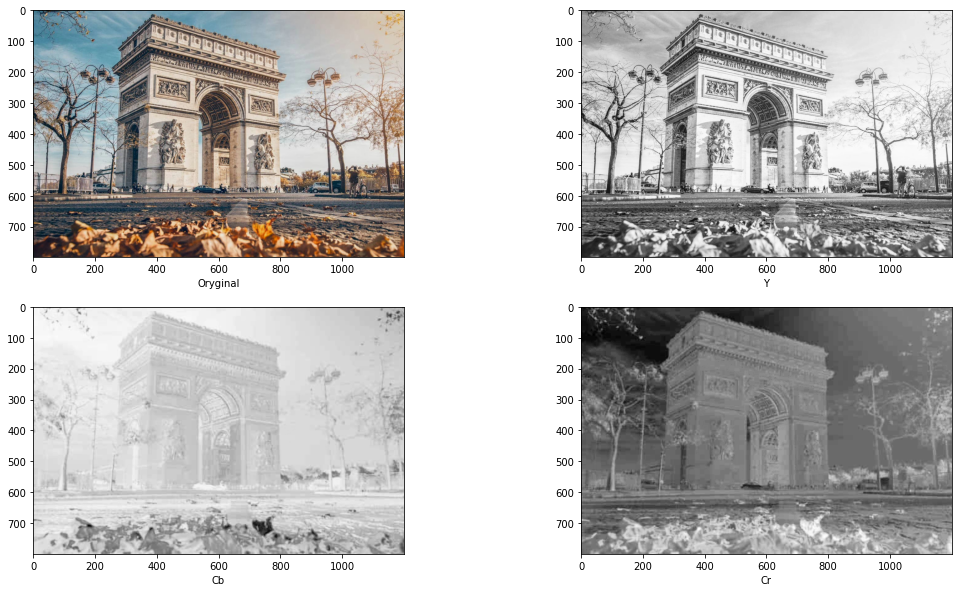

In [82]:
#
#sub = add.astype(np.uint8)
#returning = np.linalg.inv(convert) 
# A*B=C <=> A^(-1)*A*B=A^(-1)*C <=> I*B=A^(-1)*C <=> B=A^(-1)*C

Y = []
Cb = []
Cr = []
for x in range(0, len(newYCC)):
    for y in range(0, len(newYCC[0])):
        Y.append(newYCC[x][y][0])
        if x%2==0 and y%2==0:
            Cr.append(newYCC[x][y][1])
            Cb.append(newYCC[x][y][2])
CbUp = []
CrUp = []
check = len(newYCC[0])%2
base = len(newYCC[0])//2
i = 0
for x in range(0,len(Cb)):
    if i > base: #koniec kolumny
        i = 0
        if check == 1: #przypadek nieparzystej ilości kolumn
            CbUp.append(Cb[x])
            CrUp.append(Cr[x])
        for y in range(0, base):
            CbUp.append(Cb[x-base+y])
            CbUp.append(Cb[x-base+y])
            CrUp.append(Cr[x-base+y])
            CrUp.append(Cr[x-base+y])
        if check == 1:
            CbUp.append(Cb[x])
            CrUp.append(Cr[x])
            continue
    i += 1
    CbUp.append(Cb[x])
    CbUp.append(Cb[x])
    CrUp.append(Cr[x])
    CrUp.append(Cr[x])
if check == 0:
    for x in range(0, base):
        CbUp.append(Cb[-base+x])
        CbUp.append(Cb[-base+x])
        CrUp.append(Cr[-base+x])
        CrUp.append(Cr[-base+x])
#nie interesuje nas nieprazysta ilość wierszy, ponieważ będziemy zczytywać ilościowo z Y
tab = []
for x in range(0, len(Y)):
    tab.append([Y[x], CrUp[x], CbUp[x]])
tab = np.asarray(tab)
tab = tab.astype(np.uint8)

#newImage = []
#for row in tab:
#    col = np.asarray(row).reshape(3,1)
#    col -= sub
#    sums = np.matmul(returning,col)
#    sums = sums.reshape(1,3)
#    newImage.append(sums)
#np.clip(newImage, 0, 255)
#newImage = np.asarray(newImage).reshape(image.shape)
#newImage = newImage.astype(np.uint8)
#
#Wydawało mi się, że to dobre rozumowanie, ale wynik absolutnie się nie zgadza

tab = tab.reshape(image.shape)

newImage = cv.cvtColor(tab,cv.COLOR_YCrCb2RGB)

fig, ax = plt.subplots(2,2)
ax[0, 0].imshow(newImage)
ax[0, 0].set_xlabel("Oryginal")
ax[0, 1].imshow(tab[:,:,0], cmap="Greys_r")
ax[0, 1].set_xlabel("Y")
ax[1, 0].imshow(tab[:,:,2], cmap="Greys_r")
ax[1, 0].set_xlabel("Cb")
ax[1, 1].imshow(tab[:,:,1], cmap="Greys_r")
ax[1, 1].set_xlabel("Cr")
#

# Zadanie 5

In [88]:
#
MSE_RGB = 0
MSE_Y = 0
MSE_Cr = 0
MSE_Cb = 0

for x in range(0, len(image)):
    for y in range(0, len(image[0])):
        MSE_RGB += (float(image[x][y][0])-float(newImage[x][y][0]))**2 
        MSE_RGB += (float(image[x][y][1])-float(newImage[x][y][1]))**2
        MSE_RGB += (float(image[x][y][2])-float(newImage[x][y][2]))**2
        MSE_Y += (float(newYCC[x][y][0])-float(tab[x][y][0]))**2
        MSE_Cr += (float(newYCC[x][y][1])-float(tab[x][y][1]))**2
        MSE_Cb += (float(newYCC[x][y][2])-float(tab[x][y][2]))**2
pixels = len(image) * len(image[0])
MSE_RGB /= pixels*3
MSE_Y /= pixels
MSE_Cr /= pixels
MSE_Cb /= pixels
print("Błąd średniokwadratowy między obrazami wynosi: " + str(MSE_RGB))
print("Błąd średniokwadratowy między kanałami Y wynosi: " + str(MSE_Y))
print("Błąd średniokwadratowy między kanałami Cb wynosi: " + str(MSE_Cb))
print("Błąd średniokwadratowy między kanałami Cr wynosi: " + str(MSE_Cr))
#

Błąd średniokwadratowy między obrazami wynosi: 164.21399652777777
Błąd średniokwadratowy między kanałami Y wynosi: 0.0
Błąd średniokwadratowy między kanałami Cb wynosi: 2.6160135416666668
Błąd średniokwadratowy między kanałami Cr wynosi: 2.834775
